In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# MNIST 데이터

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

Saving figure some_digit_plot


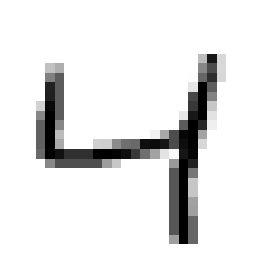

In [6]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[2]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [7]:
some_digit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [8]:
y = y.astype(np.uint8)

In [9]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [10]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [11]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


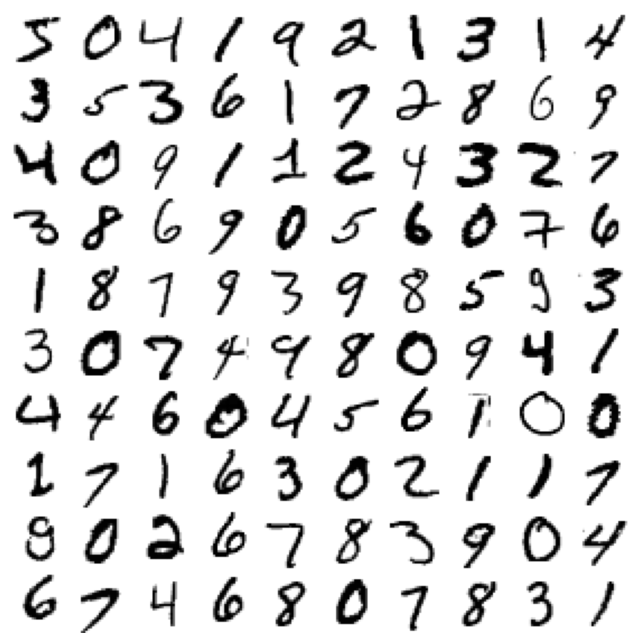

In [12]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [13]:
y[0]

5

In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# 이진분류기 (Binary classifier)

문제를 단순화해서 숫자 5만 식별해보자.

In [15]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [16]:
y_train_5

array([ True, False, False, ...,  True, False, False])

로지스틱 회귀 모델을 사용해보자.

In [18]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train_5)

In [19]:
log_clf.predict([X[0],X[1],X[2]])

array([ True, False, False])

교차 검증을 사용해서 평가해보자.

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(log_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9737 , 0.9716 , 0.97235])

모든 교차 검증 폴드에 대해 정확도가 97% 이상임. 모델이 좋아 보이는가?

In [21]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros(len(X), dtype=bool)

In [22]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [23]:
never_5_clf.predict(X)

array([False, False, False, ..., False, False, False])

이미지의 10%만 숫자 5이기 때문에 무조건 5가 아닌 것으로 예측하면 정확도는 90%가 된다. 목표값(클래스)들이 불균형인 경우에 정확도(accuracy)는 좋은 지표가 아니다.

### 오차행렬 (Confusion matrix)

In [24]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(log_clf, X_train, y_train_5, cv=3)

In [25]:
y_train_pred.shape

(60000,)

In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53961,   618],
       [ 1029,  4392]], dtype=int64)

<div>
<img src="images/fig3-2.png" width="600"/>
</div>

### precision = $\frac{TP}{TP+FP}$ (정밀도)

### recall = $\frac{TP}{TP+FN}$ (재현율)

In [27]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8766467065868263

In [28]:
4395/(4395+541)

0.8903970826580226

In [29]:
recall_score(y_train_5, y_train_pred)

0.8101826231322634

In [30]:
4395/(4395+1026)

0.8107360265633647

In [31]:
confusion_matrix(y_train_5, never_5_clf.predict(X)[:60000])

array([[54579,     0],
       [ 5421,     0]], dtype=int64)

In [32]:
precision_score(y_train_5, never_5_clf.predict(X)[:60000])

C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [33]:
recall_score(y_train_5, never_5_clf.predict(X)[:60000])

0.0

##  Error cases 조사하기

In [34]:
errors = (y_train_pred != y_train_5)

In [35]:
errors

array([False, False, False, ..., False, False, False])

Saving figure more_digits_plot


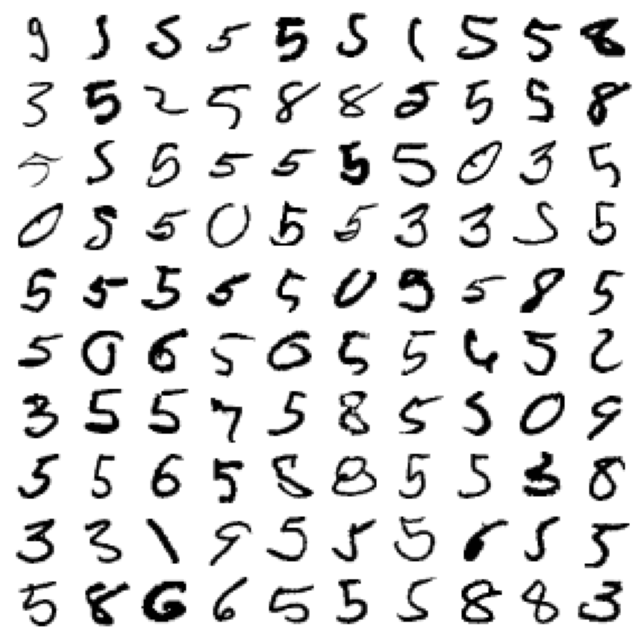

In [36]:
plt.figure(figsize=(9,9))
plot_digits(X_train[errors][:100], images_per_row=10)

save_fig("more_digits_plot")
plt.show()

## Precision/Recall Trade-off

$ $

<div>
<img src="images/fig3-3.png" width="700"/>
</div>

In [37]:
for i in range(len(errors)):
    if errors[i]:
        print(i)

48
132
138
173
244
278
470
504
512
528
540
554
558
610
615
627
635
690
748
769
778
832
836
879
899
916
924
1015
1021
1024
1029
1032
1089
1102
1104
1111
1145
1151
1222
1278
1298
1311
1324
1325
1328
1346
1356
1433
1453
1468
1587
1682
1784
1806
1930
2000
2028
2148
2172
2184
2207
2209
2211
2213
2272
2302
2308
2368
2373
2385
2395
2428
2486
2566
2622
2636
2744
2758
2803
2958
3013
3034
3070
3095
3204
3205
3216
3268
3289
3401
3416
3502
3524
3537
3580
3638
3648
3872
3918
3969
4004
4066
4148
4184
4192
4205
4231
4304
4416
4475
4562
4596
4645
4665
4666
4786
4801
4820
4908
4958
5066
5080
5157
5177
5188
5250
5255
5303
5309
5382
5414
5506
5526
5554
5632
5666
5678
5737
5738
5752
5757
5771
5798
5839
5847
5857
5904
5925
5947
5956
6066
6096
6171
6236
6264
6370
6418
6450
6472
6504
6636
6644
6735
6836
6844
6848
6895
6920
6929
6943
7032
7044
7068
7080
7112
7134
7226
7232
7270
7281
7286
7323
7346
7354
7368
7498
7544
7546
7584
7639
7833
7842
7865
7871
7884
7907
7917
7962
8009
8062
8190
8307
8339
8414
8419
843

58976
59196
59286
59294
59368
59390
59400
59426
59446
59459
59563
59574
59584
59670
59701
59719
59726
59729
59731
59747
59822
59948


In [38]:
y_train_pred[48], y_train_5[48]

(True, False)

In [39]:
some_digit = X_train[48]

y_scores = log_clf.decision_function([some_digit])
y_scores

array([0.41913218])

Saving figure some_digit_plot


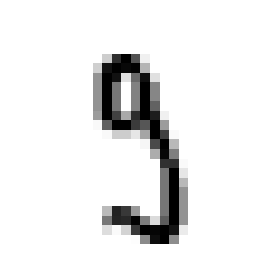

In [40]:
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [41]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [42]:
threshold = 0.5
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [43]:
y_scores = cross_val_predict(log_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [44]:
y_scores.shape

(60000,)

In [45]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [46]:
precisions.shape

(59959,)

In [47]:
thresholds.shape

(59958,)

Saving figure precision_vs_recall_plot


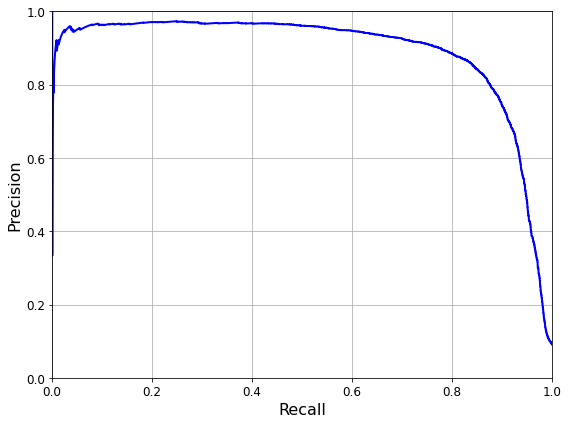

In [48]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot")
plt.show()

## 다중 분류 (Multiclass Classification)

In [52]:
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class="multinomial",solver="newton-cg", C=10)
softmax_reg.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
softmax_reg.predict(X_train)[:10]

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = softmax_reg.predict(X_test)
accuracy_score(y_test, y_pred)

## Data Augmentation

In [53]:
from scipy.ndimage.interpolation import shift

In [54]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

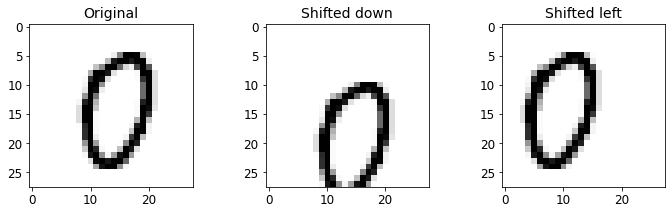

In [55]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [56]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [57]:
X_train_augmented.shape

(300000, 784)

In [58]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [59]:
X_train_augmented.shape, X_train.shape

((300000, 784), (60000, 784))

In [60]:
softmax_reg_augmented = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg_augmented.fit(X_train_augmented, y_train_augmented)

KeyboardInterrupt: 

In [ ]:
y_pred = softmax_reg_augmented.predict(X_test)
accuracy_score(y_test, y_pred)

## Titanic 데이터셋

In [61]:
import numpy as np
import pandas as pd

In [63]:
train_data = pd.read_csv("titanic.csv")

In [64]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


속성들

* **Survived**: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
* **Pclass**: passenger class.
* **Name**, **Sex**, **Age**: self-explanatory
* **SibSp**: how many siblings & spouses of the passenger aboard the Titanic.
* **Parch**: how many children & parents of the passenger aboard the Titanic.
* **Ticket**: ticket id
* **Fare**: price paid (in pounds)
* **Cabin**: passenger's cabin number
* **Embarked**: where the passenger embarked the Titanic

In [65]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age, Cabin, Embarked 속성들이 missing value를 가지고 있다.

Cabin, Name, Ticket 속성들은 무시한다.

In [66]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


오직 40% 미만이 생존했음을 알 수 있다.

In [67]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Categorical 속성들을 조사해보자.

In [68]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [69]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [70]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [71]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

Numerical 속성을 처리하는 pipeline을 만든다.

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
        ("imputer", SimpleImputer(strategy="median")),
    ])

In [73]:
num_pipeline.fit_transform(train_data)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [74]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [75]:
from sklearn.preprocessing import OneHotEncoder

In [76]:
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked"])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [77]:
cat_pipeline.fit_transform(train_data)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [78]:
cat_pipeline.fit_transform(train_data)[0]

array([0., 0., 1., 0., 1., 0., 0., 1.])

Categorical, numerical 속성들을 통합한다.

In [79]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [80]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

In [81]:
X_train.shape

(891, 12)

목표값 벡터

In [82]:
y_train = train_data["Survived"]

In [83]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [85]:
log_clf = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)

In [86]:
a = np.c_[log_clf.decision_function(X_train), y_train, X_train]

In [87]:
df = pd.DataFrame(data=a, columns=["Score", "Survived", "Age", "SibSp", "Parch", "Fare", "Pclass_1", "Pclass_2", "Pclass_3", "Female", "Male", "Embarked_C", "Embarked_Q", "Embarked_S"])

In [88]:
df

,Score,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,-2.339874,0.0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.353443,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.476488,1.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.986317,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-2.495761,0.0,35.0,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-1.014699,0.0,27.0,0.0,0.0,13.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
887,2.808858,1.0,19.0,0.0,0.0,30.0000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
888,-0.041745,0.0,28.0,1.0,2.0,23.4500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
889,0.331663,1.0,26.0,0.0,0.0,30.0000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [89]:
df.sort_values(by=['Score'], ascending=False)[:20]

,Score,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Female,Male,Embarked_C,Embarked_Q,Embarked_S
258,4.040257,1.0,35.0,0.0,0.0,512.3292,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
700,3.524523,1.0,18.0,1.0,0.0,227.5250,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
689,3.384623,1.0,15.0,0.0,1.0,211.3375,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
329,3.331061,1.0,16.0,0.0,1.0,57.9792,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
297,3.281306,0.0,2.0,1.0,2.0,151.5500,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
307,3.219776,1.0,17.0,1.0,0.0,108.9000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
310,3.204266,1.0,24.0,0.0,0.0,83.1583,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
641,3.164446,1.0,24.0,0.0,0.0,69.3000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
369,3.164446,1.0,24.0,0.0,0.0,69.3000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
306,3.139503,1.0,28.0,0.0,0.0,110.8833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [90]:
df.sort_values(by=['Score'])[:20]

,Score,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Female,Male,Embarked_C,Embarked_Q,Embarked_S
201,-4.735359,0.0,28.0,8.0,2.0,69.5500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
324,-4.735359,0.0,28.0,8.0,2.0,69.5500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
846,-4.735359,0.0,28.0,8.0,2.0,69.5500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
159,-4.735359,0.0,28.0,8.0,2.0,69.5500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
851,-3.904723,0.0,74.0,0.0,0.0,7.7750,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
326,-3.439750,0.0,61.0,0.0,0.0,6.2375,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
116,-3.438568,0.0,70.5,0.0,0.0,7.7500,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
94,-3.364627,0.0,59.0,0.0,0.0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
683,-3.361330,0.0,14.0,5.0,2.0,46.9000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
13,-3.333218,0.0,39.0,1.0,5.0,31.2750,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
